In [1]:
# Loading the data 
import os
os.chdir('C:/Users/cui62/Desktop/zentativity/Kaggle_Binary Classification with a Tabular Reservation Cancellation Dataset')

https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction

In [29]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
import time
import warnings

warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
#Import different boosting algorithms
import lightgbm as lgb # LightGBM is a gradient boosting framework that uses tree-based learning algorithms
from lightgbm import LGBMClassifier # LGBMClassifier is a classifier from LightGBM package
from catboost import CatBoostClassifier # CatBoostClassifier is a gradient boosting library that uses decision trees
from xgboost import XGBClassifier, plot_importance # XGBClassifier is a classifier from XGBoost package

In [143]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


In [5]:
test

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

The goal is to predict booking_status if the booking is going to be cancelled or not.

0 - No, 1- Yes

Metrics:

Area under the ROC curve

In [8]:
train.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
test.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

* There are 18 columns in total - 17 X variables and 1 Y variable(booking_status) * No missing data. No need to deal with missing value in this case.
* In terms of data type, all X variables are numerical (int) type while avg_price_per_room is float64 type.
* required_car_parking_space, repeated_guest are binary(categorical) variable.
* type of meal plan, room_type_reserved, market_segment_type are categorical variable.

In [10]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,42100.0,21049.500000,12153.367503,0.0,10524.75,21049.50,31574.25,42099.0
no_of_adults,42100.0,1.920713,0.524950,0.0,2.00,2.00,2.00,4.0
no_of_children,42100.0,0.141093,0.450128,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,42100.0,0.884632,0.885693,0.0,0.00,1.00,2.00,7.0
no_of_week_nights,42100.0,2.398005,1.427330,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,42100.0,0.239192,0.587674,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,42100.0,0.025249,0.156884,0.0,0.00,0.00,0.00,1.0
room_type_reserved,42100.0,0.428931,0.832605,0.0,0.00,0.00,1.00,6.0
lead_time,42100.0,103.888029,81.069343,0.0,37.00,93.00,155.00,443.0
arrival_year,42100.0,2017.856295,0.350795,2017.0,2018.00,2018.00,2018.00,2018.0


In [11]:
x_cols = [col for col in train.columns if col not in {'booking_status'}]
y_col = 'booking_status'

x_cols_ord = [col for col in x_cols if train[col].nunique() < 30]
x_cols_num = [col for col in x_cols if col not in x_cols_ord]

In [12]:
#   train[train.duplicated(x_cols, keep=False)].sort_values(x_cols)

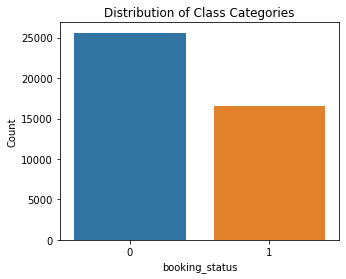

In [13]:
status_counts = train['booking_status'].value_counts()

# Creating a bar plot
plt.figure(figsize=(5,4))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of Class Categories')
plt.xlabel('booking_status')
plt.ylabel('Count')
plt.show()

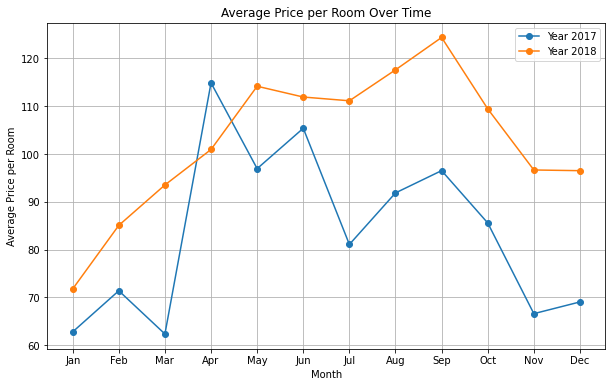

In [136]:
# Group the data by arrival year and month, and calculate the mean price
average_price_over_time = train.groupby(['arrival_year', 'arrival_month'])['avg_price_per_room'].mean().reset_index()

# Create a line plot for each year
plt.figure(figsize=(10, 6))

for year in average_price_over_time['arrival_year'].unique():
    year_data = average_price_over_time[average_price_over_time['arrival_year'] == year]
    plt.plot(year_data['arrival_month'], year_data['avg_price_per_room'], label=f'Year {year}', marker='o')

plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Average Price per Room')
plt.title('Average Price per Room Over Time')
plt.legend()
plt.grid(True)
plt.show()

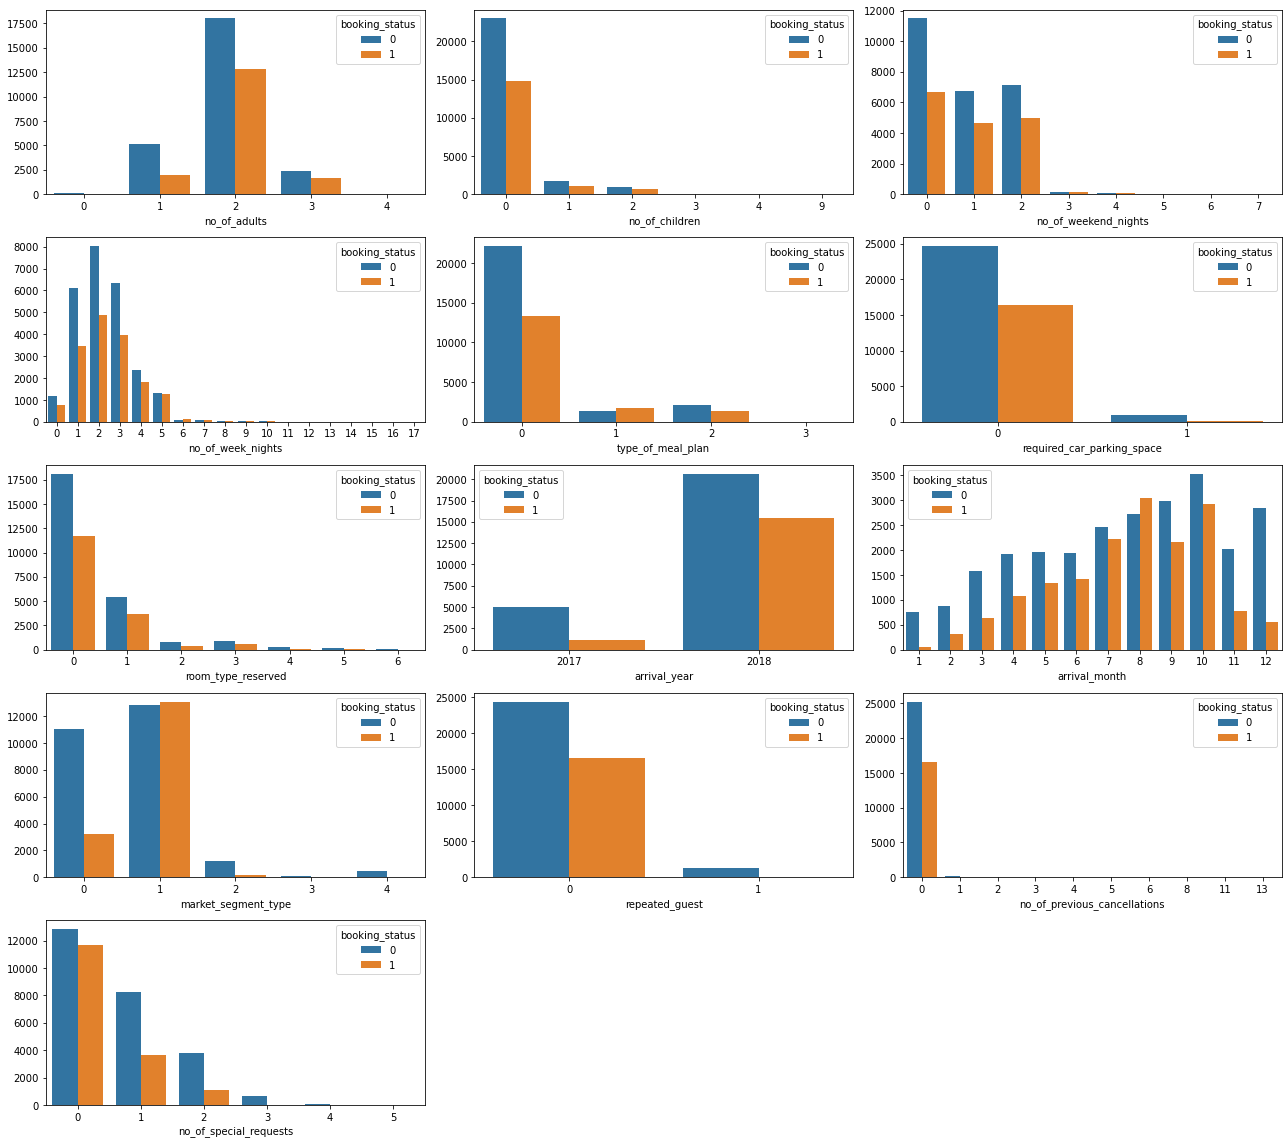

In [14]:
rows, cols = math.ceil(len(x_cols_ord) / 3), 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 16))

for col, ax in zip(x_cols_ord, axes.flatten()):
    sns.countplot(x=train[col],
                  hue=train[y_col],
                  ax=ax)

    ax.set_ylabel('')

for ax in axes.flatten():
    if not ax.get_xlabel():
        ax.set_visible(False)

plt.tight_layout() 

repeated_guest: As seen in the bar chart, the above graph bolsters the evidence that customers who make cancellations are new comers.
Repeaeted guests are less likely to cancel the booking (0.06%). the assumption holds true.

no_of previous_cancellation: Based on the data, it's hard to say customers who make cancellation often are more likely to cancel their booking.

arrival month: Cancellation rates sores around summer season. Especially on August.

Obviously, market segment type could play important role in cancellation prediction.
As we only have dummy variable of market segment type, does this number stands for.
I assume this is kind of purchasing route for customers. please refer to below graph from 'hotel booking calcellation prediction':

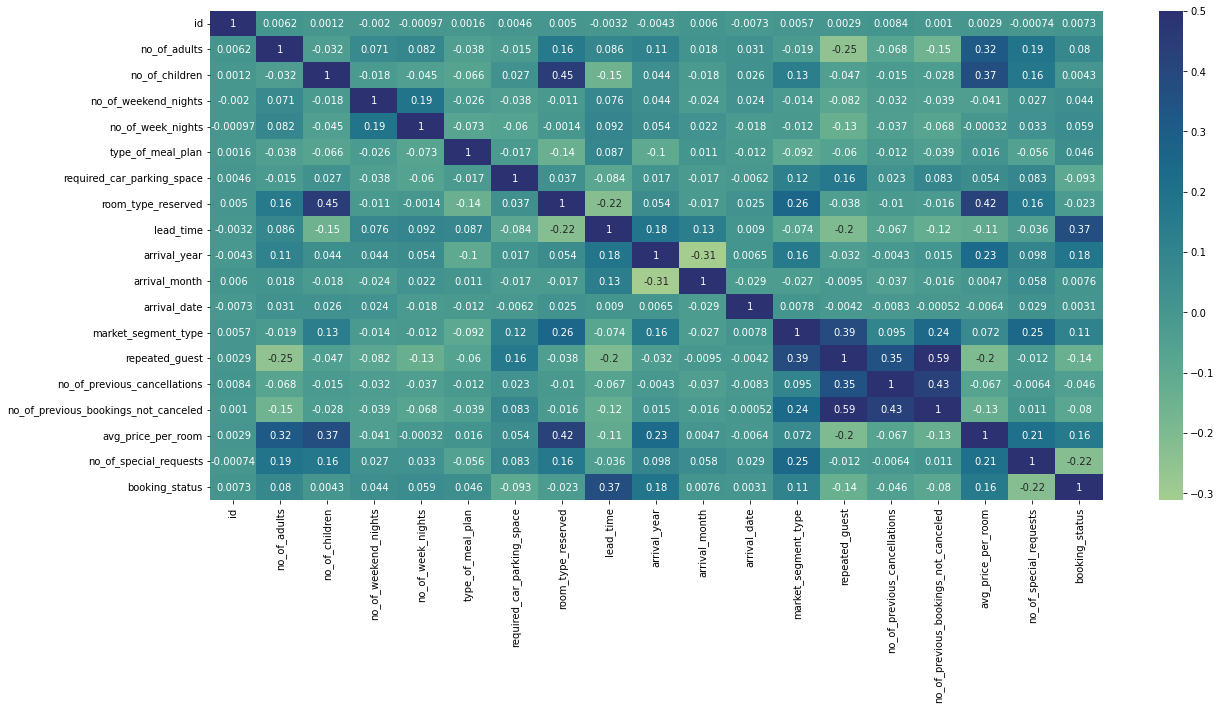

In [15]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.5, annot=True, cmap="crest");

In [16]:
corr= train.corr(method='pearson')['booking_status'][:]
corr

id                                      0.007264
no_of_adults                            0.079760
no_of_children                          0.004260
no_of_weekend_nights                    0.044279
no_of_week_nights                       0.058506
type_of_meal_plan                       0.045980
required_car_parking_space             -0.093262
room_type_reserved                     -0.023087
lead_time                               0.374865
arrival_year                            0.178326
arrival_month                           0.007639
arrival_date                            0.003124
market_segment_type                     0.112648
repeated_guest                         -0.136065
no_of_previous_cancellations           -0.045599
no_of_previous_bookings_not_canceled   -0.080166
avg_price_per_room                      0.157484
no_of_special_requests                 -0.220278
booking_status                          1.000000
Name: booking_status, dtype: float64

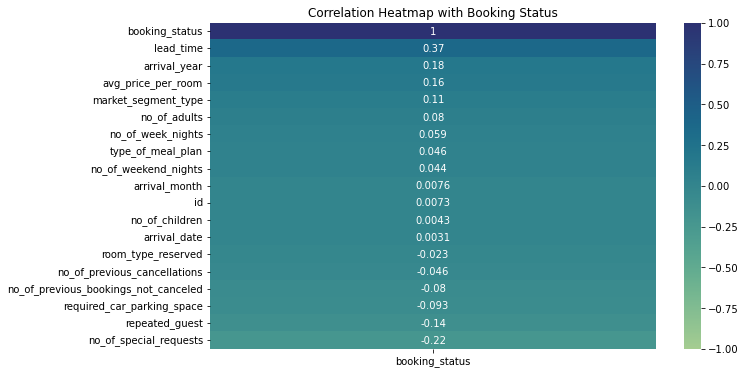

In [138]:
# Sort the correlations in descending order
sorted_corr = corr.sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_corr.to_frame(), annot=True, cmap='crest', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Booking Status')
plt.show()

Assumptions about impact of features:

High:lead_time, market_segment_type, repeated_guest, avg_price_per_room, no_of_special_requests, arrival_year

Medium: no_of_previous_cancellations, no_of_previous_bookings_not_canceled, arrival_month

Low: no_of_children, no_of_adults,no_of_weekend_nights ,no_of_week_nights , room_type_reserved, arrival_date, type_of_meal_plan


The earlier the booking made, higher the chances of cancellation.

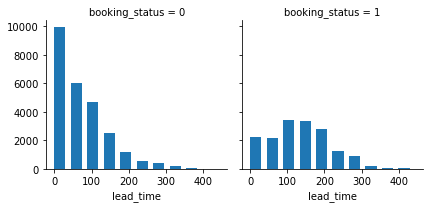

In [17]:
grid = sns.FacetGrid(train, col='booking_status')
grid.map(plt.hist, 'lead_time', width=30)
grid.add_legend()


cancellation rates is hight during the lead time bewteen 100 days ~200 days.
cancellation occurs everytime!

seperating the target column from the features

In [111]:
train = pd.read_csv("train.csv", index_col='id')
test = pd.read_csv("test.csv", index_col='id')

In [112]:
X_train = train.drop(['booking_status'],axis = 1)
y_train = train.pop('booking_status')
X_test = test

In [38]:
# Initialize and train models
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate models
logreg_preds = logreg_model.predict(X_test)
logreg_auc = roc_auc_score(y_test, logreg_preds)

rf_preds = rf_model.predict(X_test)
rf_auc = roc_auc_score(y_test, rf_preds)

xgb_preds = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_preds)

nn_preds = nn_model.predict(X_test)
nn_auc = roc_auc_score(y_test, nn_preds)

# Compare and print results
print(f"Logistic Regression AUC: {logreg_auc}")
print(f"Random Forest AUC: {rf_auc}")
print(f"XGBoost AUC: {xgb_auc}")
print(f"Neural Network AUC: {nn_auc}")

[11:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Epoch 1/10
1053/1053 [==============================] - 2s 1ms/step - loss: 2.1476 - accuracy: 0.6280
Epoch 2/10
1053/1053 [==============================] - 1s 1ms/step - loss: 1.3057 - accuracy: 0.6669
Epoch 3/10
1053/1053 [==============================] - 1s 1ms/step - loss: 1.0679 - accuracy: 0.6787
Epoch 4/10
1053/1053 [==============================] - 1s 1ms/step - loss: 1.0818 - accuracy: 0.6794
Epoch 5/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.8942 - accuracy: 0.6908
Epoch 6/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.8525 - accuracy: 0.6951
Epoch 7/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.

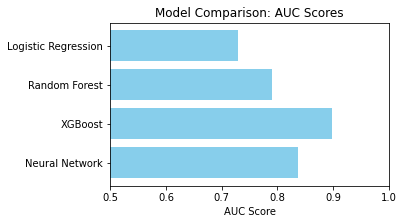

In [39]:
# List of model names
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network']

# List of AUC scores for each model
auc_scores = [logreg_auc, rf_auc, xgb_auc, nn_auc]

plt.figure(figsize=(5, 3))
plt.barh(model_names, auc_scores, color='skyblue')
plt.xlabel('AUC Score')
plt.title('Model Comparison: AUC Scores')
plt.xlim(0.5, 1.0)  # Set appropriate x-axis limits for AUC
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()

In [80]:
# one hot encoding some important features that are not ordinal or binary 
# and scaling some features that needs to be scalled

transformer = make_column_transformer(
    (OneHotEncoder(), ['type_of_meal_plan','room_type_reserved','market_segment_type']),
    #(StandardScaler(), ['lead_time','avg_price_per_room']),
    remainder='passthrough')

transformed_train = transformer.fit_transform(X_train)
transformed_test = transformer.transform(test)

X_train = pd.DataFrame(
    transformed_train, 
    columns=transformer.get_feature_names()
)

X_test= pd.DataFrame(
    transformed_test, 
    columns=transformer.get_feature_names(),
    index=test.index
)

XGB Boost classifier

In [63]:
%%time

xgb_model = XGBClassifier(eval_metric='error',
                          objective='binary:logistic',
                          n_estimators = 1000,
                          max_depth= 8,
                          learning_rate=0.05,
                          n_jobs =-1,
                          subsample =0.7,
                          colsample_bytree=0.4,
                          use_label_encoder=False
                        )
xgb_model.fit(X_train,y_train)

Wall time: 37.7 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, eval_metric='error', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [64]:
score = cross_val_score(estimator=xgb_model, X=X_train, y=y_train, scoring='roc_auc')
print(score)
print("Mean AUC-ROC:", np.mean(score))

[0.89285881 0.89773862 0.89425461 0.89801446 0.8942056 ]
Mean AUC-ROC: 0.8954144185942349


Feature Importance

[11:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


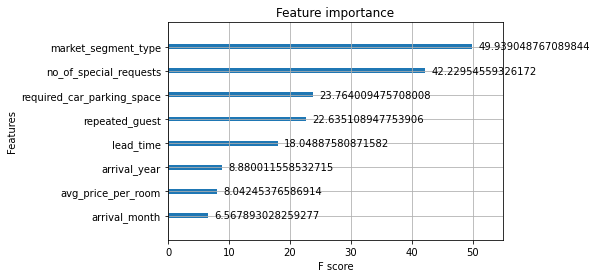

In [33]:
model = XGBClassifier()
model.fit(X_train, y_train)
plot_importance(model, importance_type='gain', max_num_features=8)

In [120]:
# Keep only the top 8 important features
selected_features = ['market_segment_type', 'no_of_special_requests', 'repeated_guest', 'required_car_parking_space', 'lead_time','arrival_year','avg_price_per_room','arrival_month']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [121]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['market_segment_type']),
    #(StandardScaler(), ['lead_time','avg_price_per_room']),
    remainder='passthrough')

# Fit and transform X_train_selected and X_test_selected
X_train_selected = transformer.fit_transform(X_train_selected)
X_test_selected = transformer.transform(X_test_selected)


In [71]:
%%time

# Initialize and train the XGBoost model with the selected features
xgb_model_selected = xgb.XGBClassifier(
    eval_metric='error',  # Set the evaluation metric to 'error'
    objective='binary:logistic',
    n_estimators=1000,            # Number of boosting rounds
    max_depth=8,                   # Maximum depth of each tree
    learning_rate=0.05,            # Learning rate for boosting
    subsample=0.7,                 # Fraction of samples used for training each tree
    colsample_bytree=0.4,          # Fraction of features used for training each tree
    use_label_encoder=False        # If using XGBoost version 1.4.0 or later
)

xgb_model_selected.fit(X_train_selected, y_train)

score_selected = cross_val_score(estimator=xgb_model_selected, X=X_train_selected, y=y_train, scoring='roc_auc')
print(score_selected)
print("Mean AUC-ROC:", np.mean(score_selected))

[0.89318074 0.89813771 0.89674145 0.89820875 0.89558666]
Mean AUC-ROC: 0.8963710604853496
Wall time: 2min 12s


In [87]:
# Define the new feature avg_price_per_person
new_feature_train = X_train['avg_price_per_room'] / (X_train['no_of_adults'] + X_train['no_of_children'])
new_feature_train = new_feature_train.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN

new_feature_test = X_test['avg_price_per_room'] / (X_test['no_of_adults'] + X_test['no_of_children'])
new_feature_test = new_feature_test.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN

# Fill NaN values with a default value or strategy (e.g., 0)
new_feature_train = new_feature_train.fillna(0)
new_feature_test = new_feature_test.fillna(0)


In [88]:
%%time

# Append the new feature to the transformed data
X_train_featured = np.column_stack((X_train, new_feature_train))
X_test_featured = np.column_stack((X_test, new_feature_test))

# Initialize and train the XGBoost model with the transformed features
xgb_model_featured = XGBClassifier(
    eval_metric='auc',
    objective='binary:logistic',
    n_estimators=1000,
    max_depth=8,
    learning_rate=0.05,
    n_jobs=-1,
    subsample=0.7,
    colsample_bytree=0.4,
    use_label_encoder=False
)
xgb_model_featured.fit(X_train_featured, y_train)

score_selected = cross_val_score(estimator=xgb_model_featured, X=X_train_featured, y=y_train, scoring='roc_auc')
print(score_selected)
print("Mean AUC-ROC:", np.mean(score_selected))

[0.89468899 0.8959067  0.89461216 0.89852201 0.89430053]
Mean AUC-ROC: 0.895606076771652


XGB Tuning

In [125]:
%%time

xgb_param ={'n_estimators': [100,150,200,250,300,600,700,1000,2000],
   "learning_rate": [0.05, 0.10, 0.15 ],
   "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
   "min_child_weight": [ 1, 3, 5, 7 ],
   "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
   "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7,0.9 ],
    'subsample' :[0.7,0.8,0.9]    
}

xgb_search = RandomizedSearchCV(estimator=XGBClassifier(),
                            param_distributions=xgb_param,
                            cv=5,
                            verbose=1,
                            n_jobs=-1,
                            n_iter = 30
                            )

xgb_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[15:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 35min 26s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [126]:
best_xgb = xgb_search.best_estimator_
xgb_search.best_params_

{'subsample': 0.9,
 'n_estimators': 2000,
 'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [127]:
%%time

myscore=cross_val_score(estimator=best_xgb, X=X_train_selected, y=y_train, scoring='roc_auc')
print(myscore)
print("Mean AUC-ROC:", np.mean(myscore))

[15:07:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [128]:
xgb_predictions = best_xgb.predict(X_test_selected)

In [132]:
xgb_predictions = pd.DataFrame({'id':test.index,'booking_status':xgb_predictions})
xgb_predictions


,id,booking_status
0,42100,0
1,42101,0
2,42102,0
3,42103,0
4,42104,0
...,...,...
28063,70163,1
28064,70164,0
28065,70165,0
28066,70166,1


In [133]:
# xgb_predictions.to_csv('xgb_predictions.csv',index=False)

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [145]:
ool_idxs = []

for col in train.columns:
    col_list = []
    col_list.append(col)
    if col != "id": col_list.append("id")
    train_dup = train.drop(columns = col_list)
    dup_idx = list(train_dup.loc[train_dup.duplicated(keep = "first")].index)
    print(f"# of duplicates: {len(dup_idx)} --> columns dropped: {col_list}")

    if col == "booking_status":
        ool_idxs.append(dup_idx)

print("\n booking_status value counts of duplicated rows:")
train.loc[sum(ool_idxs, [])]["booking_status"].value_counts()

# of duplicates: 0 --> columns dropped: ['id']
# of duplicates: 400 --> columns dropped: ['no_of_adults', 'id']
# of duplicates: 24 --> columns dropped: ['no_of_children', 'id']
# of duplicates: 1035 --> columns dropped: ['no_of_weekend_nights', 'id']
# of duplicates: 1406 --> columns dropped: ['no_of_week_nights', 'id']
# of duplicates: 174 --> columns dropped: ['type_of_meal_plan', 'id']
# of duplicates: 14 --> columns dropped: ['required_car_parking_space', 'id']
# of duplicates: 104 --> columns dropped: ['room_type_reserved', 'id']
# of duplicates: 2046 --> columns dropped: ['lead_time', 'id']
# of duplicates: 154 --> columns dropped: ['arrival_year', 'id']
# of duplicates: 687 --> columns dropped: ['arrival_month', 'id']
# of duplicates: 2577 --> columns dropped: ['arrival_date', 'id']
# of duplicates: 417 --> columns dropped: ['market_segment_type', 'id']
# of duplicates: 1 --> columns dropped: ['repeated_guest', 'id']
# of duplicates: 1 --> columns dropped: ['no_of_previous_canc

1    298
0    264
Name: booking_status, dtype: int64

In [147]:
train_dup

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2
42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0
42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0
42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0
